In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare_dataset.csv') 

In [3]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
# Group the data by Insurance Provider, Medical Condition, and Billing Amount
ins_conditions = data.groupby(['Insurance Provider', 'Medical Condition'])['Billing Amount'].mean().unstack()
new_ins_conditions=ins_conditions.reset_index()

In [7]:
#Melt the grouped data
ins_conditions_melted = new_ins_conditions.melt(id_vars=['Insurance Provider'], 
                    var_name='Medical Condition', 
                    value_name='Value')
ins_conditions_melted
insurance = ins_conditions_melted['Insurance Provider'].unique()

conditions = ins_conditions_melted['Medical Condition'].unique()

# Replace the names
ins_conditions_melted['Insurance Provider'] = ins_conditions_melted['Insurance Provider'].replace({
    'UnitedHealthcare': 'UHC'})

Text(0.04, 0.5, 'Average Billing Amount')

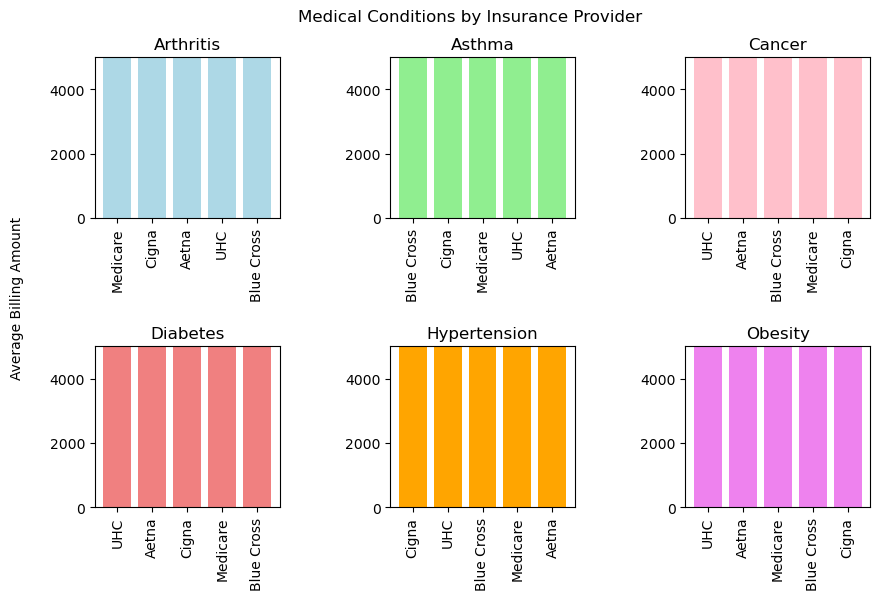

In [8]:
# Plot 4 subplots in 2 rows and 2 columns in a figure 
nrows= 2
ncols= 3
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,6))# can adjust width
axs = axs.flatten() if nrows > 1 else [axs]
fig.suptitle('Medical Conditions by Insurance Provider', fontsize=12)

# Define colors for each provider
condition_colors = {'Arthritis':'lightblue', 'Asthma':'lightgreen','Cancer':'pink','Diabetes':'lightcoral','Hypertension':'orange','Obesity':'violet'}
color_specified =  [color for color in condition_colors] 

for i, condition in enumerate(conditions): 
    ins_loc=ins_conditions_melted.loc[ins_conditions_melted['Medical Condition']==condition, ['Medical Condition','Insurance Provider','Value']]
    sort_conditions=ins_loc.sort_values('Value')
   
 # Create a subplot with every plot having the disease and for each disease how much the provider paid
    plt.style.use('seaborn-v0_8-deep') 
    axs[i].bar(sort_conditions['Insurance Provider'], sort_conditions['Value'], color=[condition_colors[color] for color in sort_conditions['Medical Condition']])
    axs[i].set_title(condition)
        
# Set x-axis limits for readability
    axs[i].set_ylim(0, len(sort_conditions['Insurance Provider']) + 5000)
    
# Rotate x-axis labels for better readability
    axs[i].tick_params(axis='x', rotation=90)

    
# Add space between subplots and adjust the overall layout
    plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.8, wspace=0.6,)
    
# Add a shared y-axis label
fig.text(0.04, 0.5, 'Average Billing Amount', va='center', rotation='vertical')

##### Group the data by Insurance Provider and count the number of admissions for each Provider
ins_admissions = data.groupby('Insurance Provider')['Date of Admission'].count().reset_index()


In [9]:
# Identify the Medical Condition that patients are being admitted the most for
most_admitted_conditions = data.groupby('Medical Condition')['Date of Admission'].count().reset_index()
most_admitted_conditions = most_admitted_conditions.sort_values(by='Date of Admission', ascending=False)
most_admitted_conditions

,Medical Condition,Date of Admission
0,Arthritis,9308
3,Diabetes,9304
4,Hypertension,9245
5,Obesity,9231
2,Cancer,9227
1,Asthma,9185


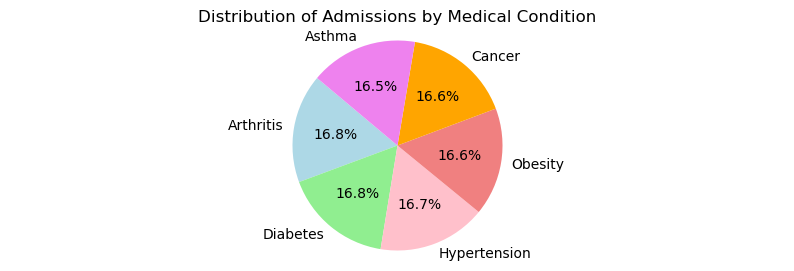

In [10]:
# Define the data for the pie chart
labels = most_admitted_conditions['Medical Condition']
sizes = most_admitted_conditions['Date of Admission']

# Define colors for each slice
colors = ['lightblue', 'lightgreen', 'pink', 'lightcoral', 'orange', 'violet']  
#plt.style.use('seaborn-v0_8-darkgrid')  not working?

# Create the pie chart with custom colors 
plt.figure(figsize=(10, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Admissions by Medical Condition')
plt.show()

In [12]:
#Conclusion1: The  highest  Provider and Billing Amount:  UnitedHealthCare, Cancer, ranging between $24860.46 million and $24857.85 million

In [13]:
#Conclusion2: The most admitted condition: Arthritis and Diabetes both at 16.8%